In [39]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u

In [41]:
mass_range = (0.8,100)
n_stars = 100000
age_max = 10 #Gyr age of Milky Way

In [42]:
#IMF kroupa parameters
alpha_0 = 0.3
alpha_1 = 1.3
alpha_2 = 2.3

In [43]:
#Usando el metodo de Montecarlo generaremos masas random usando la imf de kroupa.
def simulated_mass(n_stars,mass_range,a):
    max_i,min_i = mass_range
    mass= ((max_i**(1.0 - a) - min_i**(1.0 - a)) * np.random.random(n_stars) + min_i**(1.0 - a))**(1.0 / (1.0 - a))
    return mass

In [44]:
 def mass_age(n_stars,age_max):
    return np.random.uniform(0,age_max, n_stars)

In [45]:
def simulated_masses_2(n_stars,mass_range,age_max):
    
    #segments
    M1 = (0,0.8)
    M2 = (0.8,0.5)
    M3 = (0.5,100)
    
    # We calculate the normalized weights for each segment of imf kroupa (for calculate the probability per each segment)
    b1 = ((M1[1]**(1.0 - alpha_0) - M1[0]**(1.0 - alpha_0)) / (1.0 - alpha_0))
    b2 = ((M2[1]**(1.0 - alpha_1) - M2[0]**(1.0 - alpha_1)) / (1.0 - alpha_1))
    b3 = ((M3[1]**(1.0 - alpha_2) - M3[0]**(1.0 - alpha_2)) / (1.0 - alpha_2))
    Wt = b1 +b2 + b3

    #En cada uno de los segmentos habrá una cantidad de estrellas y las calcularemos dependiendo de la probabilidad de estar en esa banda.
    n_1 = np.random.binomial(n_stars,b1/Wt)
    n_2 = np.random.binomial(n_stars-n_1, abs(b2/Wt))
    n_3 = n_stars - (n_2 +n_1)

    #Para asignarle una edad a cada masa usaremos la siguiente función:
    masses = np.array(list(simulated_mass(n_1,M1,alpha_0)) + list(simulated_mass(n_2,M2,alpha_1))+list(simulated_mass(n_3,M3,alpha_2)))

    objects = []
    for mass in masses:
        age = mass_age(n_stars,age_max)
        objects.append((mass,age))
    return objects

In [ ]:
main_seq_stars = []
white_dwarfs = []
neutron_stars = []
black_holes = []

objects = simulated_masses_2(n_stars,mass_range,age_max)

for masa, age in objects:
    if masa < 1.5:
        main_seq_stars.append((masa, age))
    elif masa < 8.0:
        white_dwarfs.append((masa, age))
    elif 8.0 <= masa < 20.0:
        neutron_stars.append((masa, age))
    elif masa > 20.0:
        black_holes.append((masa, age))


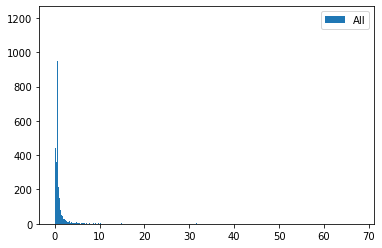

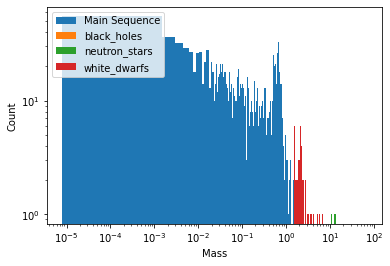

In [37]:
plt.hist([masa for masa, age in objects], bins=1000, label='All')
plt.legend()
plt.show()

plt.hist([masa for masa, age in main_seq_stars], bins=1000, label='Main Sequence')
plt.hist([masa for masa, age in black_holes], bins=1000, label='black_holes')
plt.hist([masa for masa, age in neutron_stars], bins=1000, label='neutron_stars')
plt.hist([masa for masa, age in white_dwarfs], bins=1000, label='white_dwarfs')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Mass')
plt.ylabel('Count')
plt.legend()
plt.show()

In [38]:
# Calculate and print fractions
n=len(objects)
main_seq_fraction = len(main_seq_stars) / n
white_dwarf_fraction = len(white_dwarfs) / n
neutron_star_fraction = len(neutron_stars) / n
black_hole_fraction = len(black_holes) / n

print("Main sequence fraction: "+str(main_seq_fraction))
print("White dwarf fraction: "+str(white_dwarf_fraction))
print("Neutron stars fraction: "+str(neutron_star_fraction))
print("Black holes fraction: "+str(black_hole_fraction))

Main sequence fraction: 0.9026
White dwarf fraction: 0.088
Neutron stars fraction: 0.0073
Black holes fraction: 0.0021
